<div dir=rtl align=center>

# <div dir="rtl"><font color='grey'><b>מחברת לימוד SQL
</b></font>
</div>



```
# This is formatted as code
```

# ***installing dependencies***
*execute only once when initializing the notebook.*

In [9]:
%pip install sqlalchemy==2.0.20
# !pip install requests
# !pip install ipython-sql
# !pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\timorust\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# ***loading extensions and connecting***
*(execute if notebook crashes or after disconnecting and deleting runtime)*

הריצו את הפקודות הבאות:


In [4]:
# load sql extention in order to use it above.
%load_ext sql
# change the design of the table result
%config SqlMagic.autopandas = True

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [10]:
# fetch database:
import os
import zipfile
import requests
import sqlalchemy

# Specify the download URL and file name
url = "https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip"
file_name = "chinook.zip"

# Specify the download location
download_path = os.path.join(os.getcwd(), file_name)
print(download_path)

# Download the file snd save as binary zip object
response = requests.get(url)
with open(download_path, 'wb') as f:
    f.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("chinook.db")

# delete zip file
os.unlink(download_path)
    
# connecting DB to our sqlite extension
db_path = 'sqlite:///chinook.db/chinook.db'
engine = sqlalchemy.create_engine(db_path)

c:\Users\timorust\OneDrive\Desktop\amotz-cyber-download\chinook.zip


In [11]:
%sql sqlite:///chinook.db/chinook.db

# ***SQL Drills***

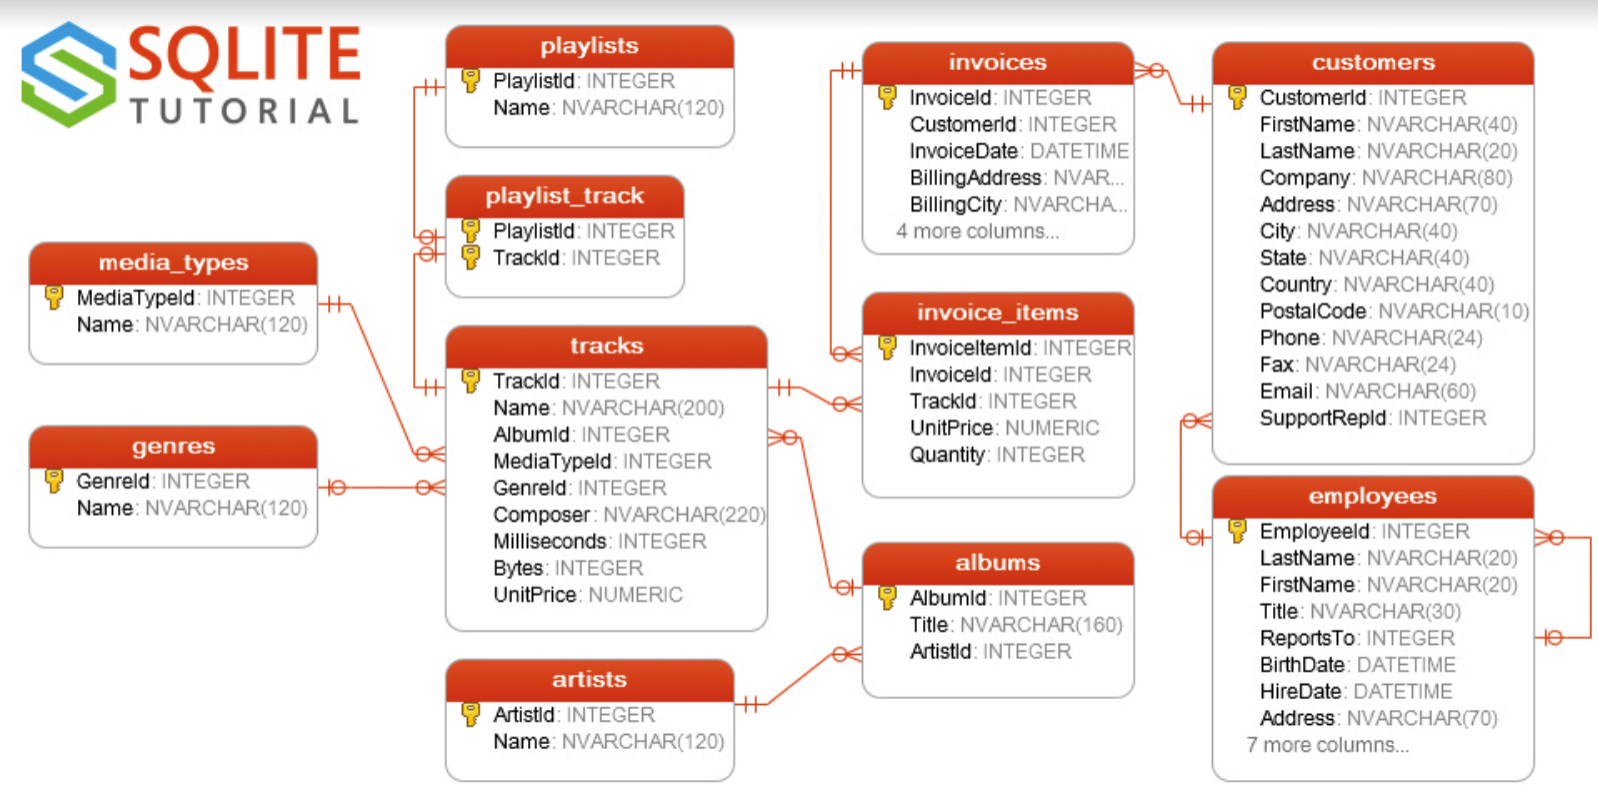

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>SELECT - החזר את כל הטבלה</b></font></div>

In [12]:
%sql SELECT * FROM tracks

 * sqlite:///chinook.db/chinook.db
Done.


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>היטל - החזר רק עמודות נבחרות</b></font></div>


In [13]:
%sql select name, composer from tracks

 * sqlite:///chinook.db/chinook.db
Done.


,Name,Composer
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson"
1,Balls to the Wall,None
2,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Princess of the Dawn,Deaffy & R.A. Smith-Diesel
...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>הגבלה - החזר רק שורות נבחרות</b></font></div>


In [24]:
%sql select Name, UnitPrice from tracks where UnitPrice < 1 

 * sqlite:///chinook.db/chinook.db
Done.


,Name,UnitPrice
0,For Those About To Rock (We Salute You),0.99
1,Balls to the Wall,0.99
2,Fast As a Shark,0.99
3,Restless and Wild,0.99
4,Princess of the Dawn,0.99
...,...,...
3285,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,0.99
3286,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",0.99
3287,"L'orfeo, Act 3, Sinfonia (Orchestra)",0.99
3288,"Quintet for Horn, Violin, 2 Violas, and Cello ...",0.99


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>UNION - החזר טבלה שמכילה את הערכים של שתי הטבלאות</b></font></div>


In [31]:
%sql SELECT TrackId, Name, AlbumId FROM tracks UNION SELECT AlbumId, ArtistId, Title FROM albums

 * sqlite:///chinook.db/chinook.db
Done.


,TrackId,Name,AlbumId
0,1,1,For Those About To Rock We Salute You
1,1,For Those About To Rock (We Salute You),1
2,2,2,Balls to the Wall
3,2,Balls to the Wall,2
4,3,2,Restless and Wild
...,...,...,...
3845,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343
3846,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344
3847,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345
3848,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>EXCEPT - הצג את הרשומות שנמצאות בעמודה A בטבלה א' ושאינן נמצאות בעמודה B בטבלה ב'
</b></font></div>


הצג את כל העובדים שאינם גם לקוחות

In [34]:
%sql select firstName from employees except select firstName from customers

 * sqlite:///chinook.db/chinook.db
Done.


,FirstName
0,Andrew
1,Jane
2,Laura
3,Margaret
4,Michael
5,Nancy


הצג את כל הלקוחות שאינם גם עובדים

In [36]:
%sql select firstName from customers except select firstName from employees

 * sqlite:///chinook.db/chinook.db
Done.


,FirstName
0,Aaron
1,Alexandre
2,Astrid
3,Bjørn
4,Camille
5,Daan
6,Dan
7,Diego
8,Dominique
9,Eduardo


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>INTERSECT - החזר רק שורות הנמצאות בשתי הטבלאות</div>


כל העובדים שהם גם לקוחות

In [39]:
%sql select firstName from employees intersect select firstName from customers

 * sqlite:///chinook.db/chinook.db
Done.


,FirstName
0,Robert
1,Steve


In [41]:
%sql select * from tracks join albums on tracks.AlbumId = albums.AlbumId

 * sqlite:///chinook.db/chinook.db
Done.


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,AlbumId,Title,ArtistId
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,1,For Those About To Rock We Salute You,1
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,1,For Those About To Rock We Salute You,1
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,1,For Those About To Rock We Salute You,1
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,1,For Those About To Rock We Salute You,1
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,1,For Those About To Rock We Salute You,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,343,Respighi:Pines of Rome,226
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,344,Schubert: The Late String Quartets & String Qu...,272
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,345,Monteverdi: L'Orfeo,273
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,346,Mozart: Chamber Music,274


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b>JOIN - החזר טבלה שהרשומות מורכבות ממידע של שתי טבלאות שונות</div>


In [42]:
%sql select * from tracks natural join albums

 * sqlite:///chinook.db/chinook.db
Done.


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Title,ArtistId
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,1
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,1
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,For Those About To Rock We Salute You,1
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,1
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,For Those About To Rock We Salute You,1
...,...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Respighi:Pines of Rome,226
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Schubert: The Late String Quartets & String Qu...,272
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Monteverdi: L'Orfeo,273
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Mozart: Chamber Music,274


In [ ]:
%sql

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור IN</div>


In [51]:
%sql select * from employees where firstName in ('Robert', 'Steve', 'Laura', 'Moses')

 * sqlite:///chinook.db/chinook.db
Done.


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


החזר רשימה של כל העובדים ששמם הפרטי הוא רוברט

In [ ]:
%sql

In [ ]:
%sql

החזר רשימה של כל העובדים ששמם הוא (Laura, Moses, Steve, Robert) בעזרת שימוש באופרייטור IN

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור  AND</div>


In [ ]:
%sql SELECT * FROM customers

החזר רשימה של כל הלקוחות ששמם הפרטי הוא מארק ושהם גרים בקנדה


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור OR</div>


החזר רשימה של כל הלקוחות ששמם הפרטי הוא מארק או שהם גרים בקנדה

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור LIKE</div>


In [53]:
%sql select * from employees where firstName like 'Robert'

 * sqlite:///chinook.db/chinook.db
Done.


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> ויילד-קארד _</div>


In [54]:
%sql select * from employees where firstName like '_a___'

 * sqlite:///chinook.db/chinook.db
Done.


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> ויילד-קארד % </div>


In [55]:
%sql select * from employees where firstName like '%re%'

 * sqlite:///chinook.db/chinook.db
Done.


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור Between </div>


In [57]:
%sql select customerId, total from invoices

 * sqlite:///chinook.db/chinook.db
Done.


,CustomerId,Total
0,2,1.98
1,4,3.96
2,8,5.94
3,14,8.91
4,23,13.86
...,...,...
407,25,3.96
408,29,5.94
409,35,8.91
410,44,13.86


In [56]:
%sql select customerId, total from invoices where total between 9 and 11

 * sqlite:///chinook.db/chinook.db
Done.


,CustomerId,Total
0,15,9.91
1,17,10.91
2,34,10.91


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודה MIN </div>


In [58]:
%sql select *, MIN(total) from invoices

 * sqlite:///chinook.db/chinook.db
Done.


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,MIN(total)
0,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99,0.99


In [ ]:
%sql

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודה MAX </div>


In [59]:
%sql select *, MAX(total) from invoices

 * sqlite:///chinook.db/chinook.db
Done.


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,MAX(total)
0,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86,25.86


In [ ]:
%sql

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודה COUNT </div>


In [61]:
%sql select total from invoices

 * sqlite:///chinook.db/chinook.db
Done.


,Total
0,1.98
1,3.96
2,5.94
3,8.91
4,13.86
...,...
407,3.96
408,5.94
409,8.91
410,13.86


In [60]:
%sql select count(total) from invoices

 * sqlite:///chinook.db/chinook.db
Done.


,count(total)
0,412


In [63]:
%sql select count(total) from invoices where BillingCity = 'Oslo'

 * sqlite:///chinook.db/chinook.db
Done.


,count(total)
0,7


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטורים חשבונאים </div>


In [65]:
%sql select sum(total) from invoices where BillingCity = 'Oslo'

 * sqlite:///chinook.db/chinook.db
Done.


,sum(total)
0,39.62


<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודה AVG </div>


In [64]:
%sql select avg(total) from invoices where BillingCity = 'Oslo'

 * sqlite:///chinook.db/chinook.db
Done.


,avg(total)
0,5.66


In [ ]:
%sql

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודה SUM </div>


In [66]:
%sql select sum(total) from invoices where BillingCity = 'Oslo'

 * sqlite:///chinook.db/chinook.db
Done.


,sum(total)
0,39.62


In [ ]:
%sql

In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> אופרייטור || </div>


In [85]:
%sql select firstName || ' ' || lastName as Name from employees

 * sqlite:///chinook.db/chinook.db
Done.


,Name
0,Andrew Adams
1,Nancy Edwards
2,Jane Peacock
3,Margaret Park
4,Steve Johnson
5,Michael Mitchell
6,Robert King
7,Laura Callahan


In [86]:
%sql select firstName || ' ' || lastName as Name from employees limit 2

 * sqlite:///chinook.db/chinook.db
Done.


,Name
0,Andrew Adams
1,Nancy Edwards


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודת ORDER BY </div>


In [70]:
%sql select * from customers order by City desc

 * sqlite:///chinook.db/chinook.db
Done.


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,33,Ellie,Sullivan,None,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,+1 (867) 920-2233,None,ellie.sullivan@shaw.ca,3
1,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
2,49,Stanisław,Wójcik,None,Ordynacka 10,Warsaw,None,Poland,00-358,+48 22 828 37 39,None,stanisław.wójcik@wp.pl,4
3,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
4,15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
5,27,Patrick,Gray,None,1033 N Park Ave,Tucson,AZ,USA,85719,+1 (520) 622-4200,None,patrick.gray@aol.com,4
6,29,Robert,Brown,None,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,+1 (416) 363-8888,None,robbrown@shaw.ca,3
7,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
8,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
9,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='ORANGE'><b> פקודת GROUP BY </div>


In [79]:
%sql select total, count(total), sum(total) from invoices group by total order by sum(total) desc 

 * sqlite:///chinook.db/chinook.db
Done.


,Total,count(total),sum(total)
0,13.86,49,679.14
1,8.91,54,481.14
2,5.94,56,332.64
3,3.96,57,225.72
4,1.98,111,219.78
5,0.99,55,54.45
6,21.86,2,43.72
7,18.86,2,37.72
8,16.86,2,33.72
9,15.86,2,31.72


<div dir="rtl">

# <div dir="rtl"><font color='grey'><b>מבנה מסד הנתונים: information_schema</div>

In [87]:
%sql select * from sqlite_master

 * sqlite:///chinook.db/chinook.db
Done.


,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [88]:
%sql select * from sqlite_master where type = 'table'

 * sqlite:///chinook.db/chinook.db
Done.


,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [90]:
%sql select name from sqlite_master where type = 'index'

 * sqlite:///chinook.db/chinook.db
Done.


,name
0,sqlite_autoindex_playlist_track_1
1,IFK_AlbumArtistId
2,IFK_CustomerSupportRepId
3,IFK_EmployeeReportsTo
4,IFK_InvoiceCustomerId
5,IFK_InvoiceLineInvoiceId
6,IFK_InvoiceLineTrackId
7,IFK_PlaylistTrackTrackId
8,IFK_TrackAlbumId
9,IFK_TrackGenreId


In [ ]:
%sql

<div dir="rtl">

# <div dir="rtl"><font color='grey'><b> EXPLAIN QUERY PLAN- הסבר את תהליך אחזור הנתונים</div>


In [ ]:
%sql